In [1]:
import folium

In [2]:
m = folium.Map(location=(48.7624060,11.4257570), zoom_start=16)

In [ ]:
from io import StringIO, BytesIO
import pandas as pd
bus_icon = folium.CustomIcon(
    "assets/bus_stop.png",
    icon_size=(38, 95),
    icon_anchor=(22, 94),
    shadow_size=(50, 64),
    shadow_anchor=(4, 62),
    popup_anchor=(-3, -76),
)

cloud = folium.Icon(icon="cloud")


In [13]:
stops = pd.read_csv('GTFS-Daten/stops.txt')
print(stops.columns)

Index(['stop_id', 'stop_code', 'stop_name', 'stop_desc', 'stop_lat',
       'stop_lon', 'zone_id', 'stop_url', 'location_type', 'parent_station',
       'platform_code', 'stop_timezone_header'],
      dtype='object')


In [25]:
stops_modified = stops[['stop_id','stop_lat','stop_lon']]
folium.Marker(location=[48.7624060,11.4257570], icon=cloud).add_to(m) 


# group_1 = folium.FeatureGroup("first group").add_to(m)
# group_1 = folium.FeatureGroup("first group") #.add_to(m)
# m.add_child(group_1)

# for i,row in stops_modified.iterrows():
#     folium.Marker(location=[row['stop_lat'],row['stop_lon']], icon=cloud).add_to(m) 

# folium.LayerControl().add_to(m)



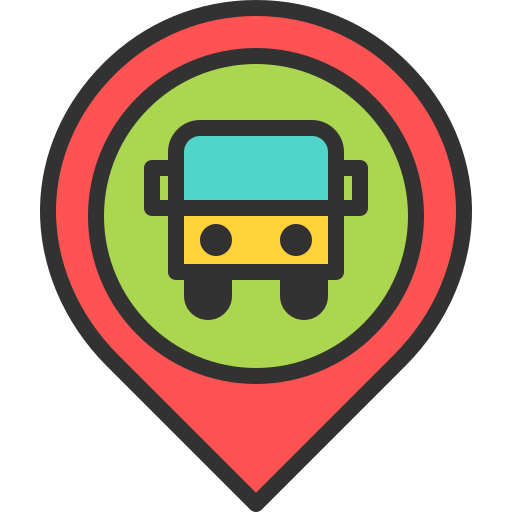

In [24]:
m
# m.save("index.html")


In [19]:
m.save("index.html")


In [ ]:
m2 = folium.Map(tiles=None)

folium.TileLayer("OpenStreetMap").add_to(m)
folium.TileLayer(show=False).add_to(m)

folium.LayerControl().add_to(m)

m


In [ ]:
#create a dictionary {stop_name: [stop_lat,stop_lon]}
#create JSON

import json

stop_dict = {}

with open("GTFS-Daten/stops.txt", "r", encoding='utf-8') as file:
    index = 0

    for line in file:
        if(index > 0):
            splittedline = line.split(",")
            if(splittedline[0][0] == ("V")):
                stop_dict[splittedline[2]] = [splittedline[4],splittedline[5]]
        index += 1
    

json_stops = json.dumps(stop_dict, indent=4)

with open("jstops.json", "w") as outfile:
    outfile.write(json_stops)

# print(stop_dict)

In [ ]:
from lxml import etree
import folium

